In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-03-06 22:49:47.918524: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 22:49:47.932805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741330187.950827   57476 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741330187.956479   57476 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 22:49:47.971475: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Part 1

## a)

Found 16000 files belonging to 4 classes.
Using 12800 files for training.
Using 3200 files for validation.


I0000 00:00:1741330197.515561   57476 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Categories: ['0', '1', '2', '3']
(32, 256, 256, 3)


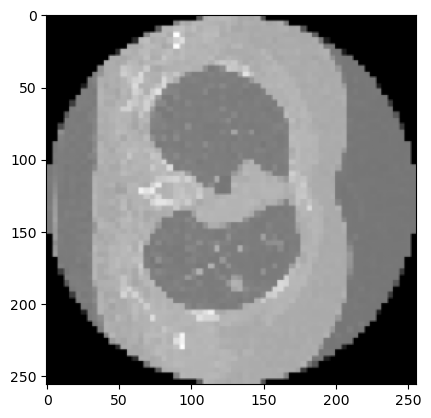

Category= 3


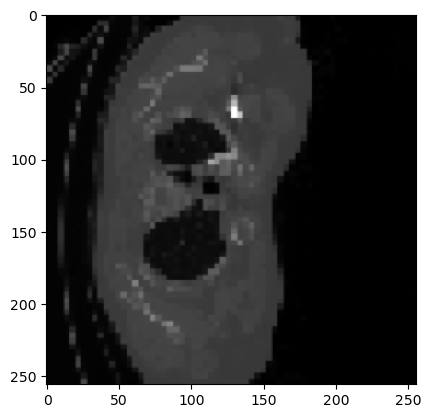

Category= 3


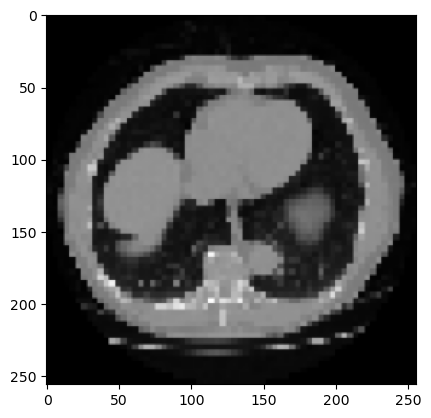

Category= 0


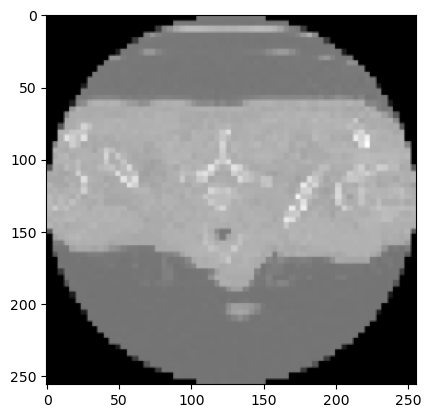

Category= 2


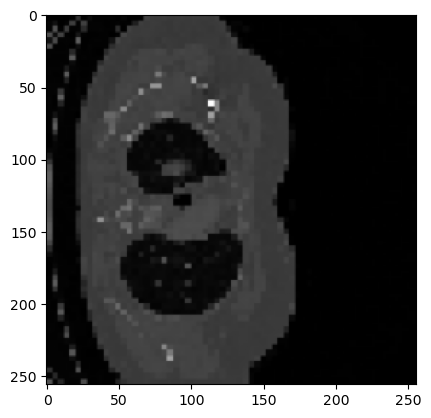

Category= 3


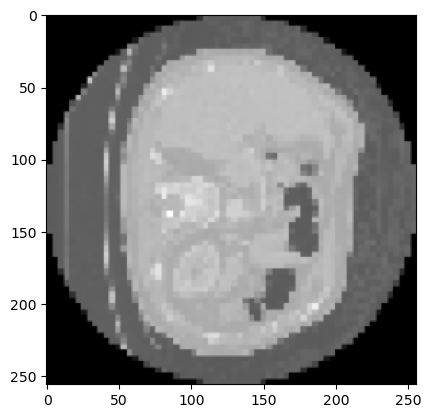

Category= 3


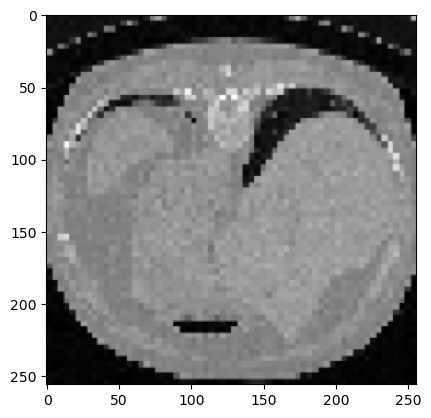

Category= 2


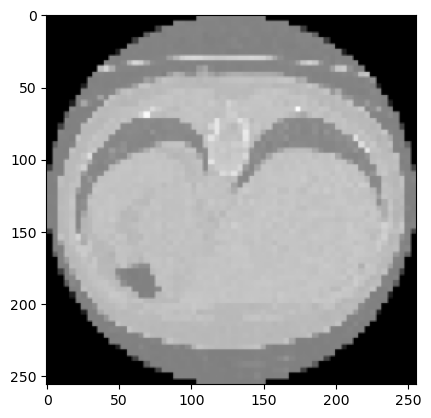

Category= 2


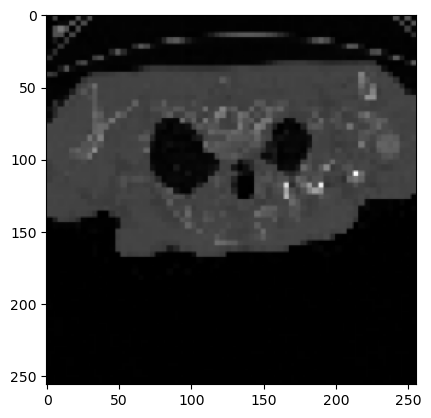

Category= 2


2025-03-06 22:49:53.629963: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [2]:
data = keras.utils.image_dataset_from_directory("Spinal/train", validation_split=0.2, subset="both", seed=1, shuffle=True)

train_data = data[0]
test_data = data[1]

categories = train_data.class_names
print("Categories:", categories)

def fcnn_normalize_data(image, label):
    image = image / 255.0
    image = tf.reshape(image, [-1, 256 * 256 * 3]) # Flatten
    return image, label

def cnn_normalize_data(image, label):
    image = image / 255.0
    return image, label


fcnn_train_data = train_data.map(fcnn_normalize_data)
fcnn_test_data = test_data.map(fcnn_normalize_data)

cnn_train_data = train_data.map(cnn_normalize_data)
cnn_test_data = test_data.map(cnn_normalize_data)

for images, labels in cnn_train_data.take(1):
    print(images.shape)
    for i in range(9):
        plt.imshow(images[i].numpy())
        plt.show()
        print("Category=", categories[labels[i]])

## b)

In [3]:
fcnn_model = keras.Sequential([
    layers.Input(shape=(256 * 256 * 3,)),  # Flattened input
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # Output layer with 4 classes
])


In [4]:
# Compile the model
fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fcnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │    50,331,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,365,316 (192.13 MB)

 Trainable params: 50,365,316 (192.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
fcnn_model.fit(fcnn_train_data, validation_data=fcnn_test_data, epochs=3)

Epoch 1/3


I0000 00:00:1741330194.787688   57582 service.cc:148] XLA service 0x7fa3bc009df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741330194.787808   57582 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-03-06 22:49:54.833421: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741330195.196864   57582 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-06 22:49:56.201725: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_286', 68 bytes spill stores, 72 bytes spill loads

2025-03-06 22:49:56.307625: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_286',

  8/400 ━━━━━━━━━━━━━━━━━━━━ 5:00 768ms/step - accuracy: 0.2696 - loss: 63.0430

I0000 00:00:1741330197.081485   57582 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6712 - loss: 12.9764 - val_accuracy: 0.9100 - val_loss: 0.5125
Epoch 2/3
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8647 - loss: 0.7497 - val_accuracy: 0.9209 - val_loss: 0.2559
Epoch 3/3
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8881 - loss: 0.3941 - val_accuracy: 0.9350 - val_loss: 0.1869


In [6]:
# Evaluation
fcnn_score = fcnn_model.evaluate(fcnn_test_data, verbose=0)
print("Test loss:", fcnn_score[0])
print("Test accuracy:", fcnn_score[1])


Test loss: 0.18691878020763397
Test accuracy: 0.9350000023841858


## c)

In [7]:
cnn_model = keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(4, activation='softmax')  # Output layer with 4 classes
])

In [8]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │     2,064,516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,065,412 (7.88 MB)

 Trainable params: 2,065,412 (7.88 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
cnn_model.fit(cnn_train_data, validation_data=cnn_test_data, epochs=5)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7764 - loss: 3.1173 - val_accuracy: 0.9934 - val_loss: 0.0317
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9960 - loss: 0.0253 - val_accuracy: 0.9969 - val_loss: 0.0147
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9995 - loss: 0.0081 - val_accuracy: 0.9972 - val_loss: 0.0120
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 0.9972 - val_loss: 0.0099
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9978 - val_loss: 0.0088


In [10]:
# Evaluation
cnn_score = cnn_model.evaluate(cnn_test_data, verbose=0)
print("Test loss:", cnn_score[0])
print("Test accuracy:", cnn_score[1])


Test loss: 0.008840219117701054
Test accuracy: 0.9978125095367432


## d)

In [11]:
# Comparing accuracy
print("FCNN accuracy:", fcnn_score[1])
print("CNN accuracy:", cnn_score[1])

FCNN accuracy: 0.9350000023841858
CNN accuracy: 0.9978125095367432


# Part 2

In [12]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


Label: frog


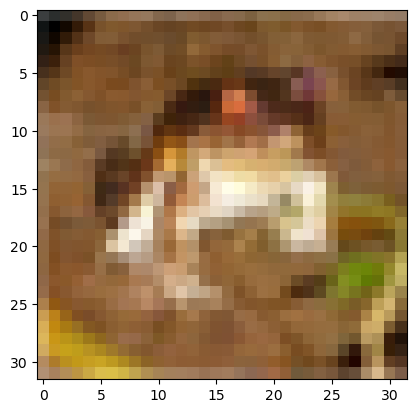

Label: truck


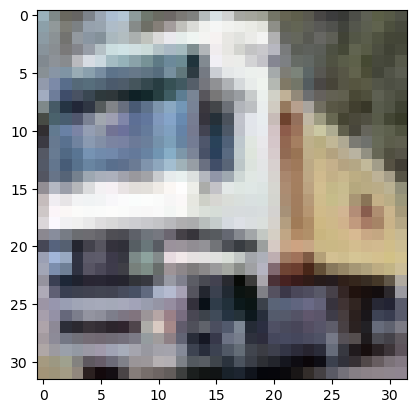

Label: truck


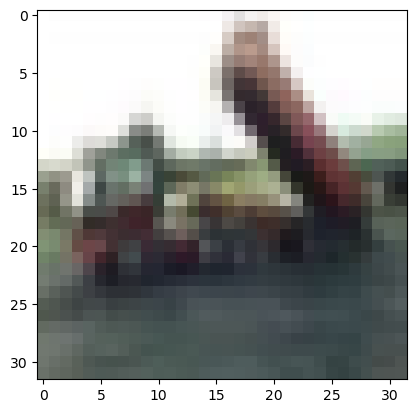

Label: deer


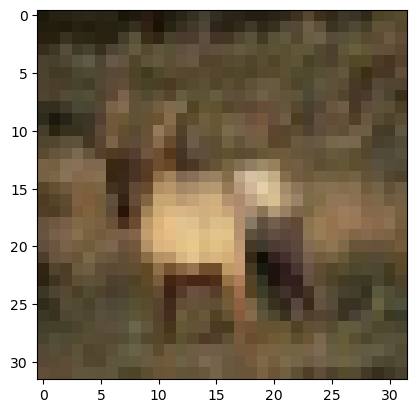

Label: automobile


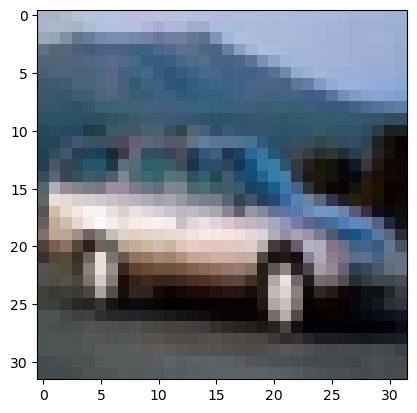

Label: automobile


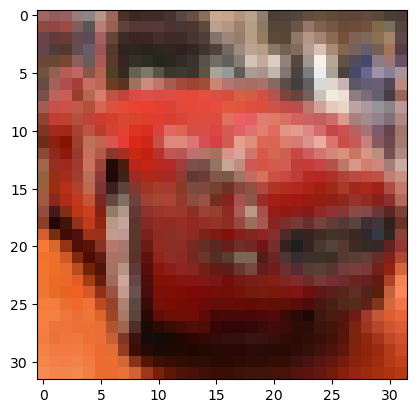

Label: bird


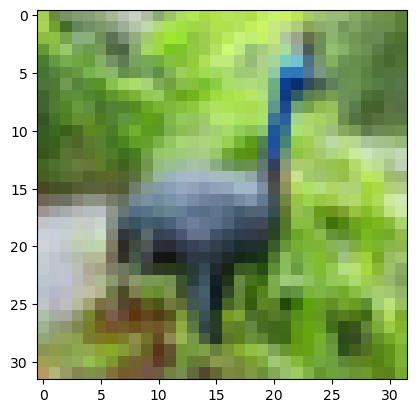

Label: horse


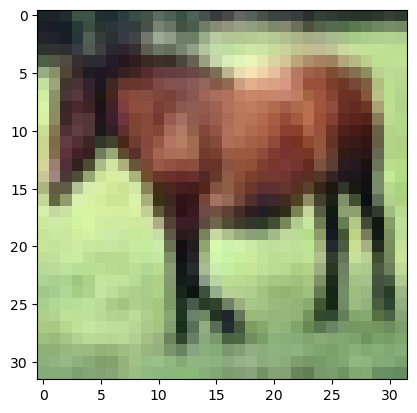

Label: ship


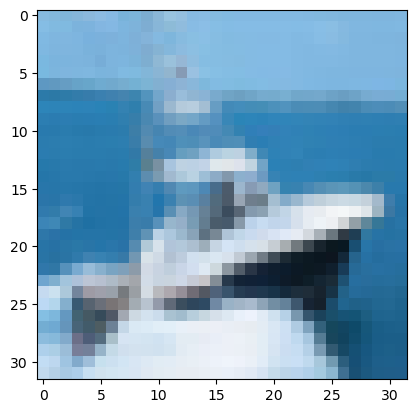

In [13]:
for i in range(0, 9):
    plt.imshow(x_train[i])
    print('Label:', class_names[y_train[i][0]])
    plt.show()

In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(320, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ]
)

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 320)            │       164,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 320)            │         1,280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,474 (1.15 MB)

 Trainable params: 301,130 (1.15 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [16]:
batch_size = 50
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


2025-03-06 22:51:52.197265: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1844', 4 bytes spill stores, 4 bytes spill loads



900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3867 - loss: 1.7605 - val_accuracy: 0.5394 - val_loss: 1.2730
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5824 - loss: 1.1717 - val_accuracy: 0.5120 - val_loss: 1.3603
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6459 - loss: 1.0059 - val_accuracy: 0.6236 - val_loss: 1.0318
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6861 - loss: 0.8938 - val_accuracy: 0.6360 - val_loss: 1.0256
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7081 - loss: 0.8209 - val_accuracy: 0.6872 - val_loss: 0.8921


In [17]:
# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9315568208694458
Test accuracy: 0.6736999750137329


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


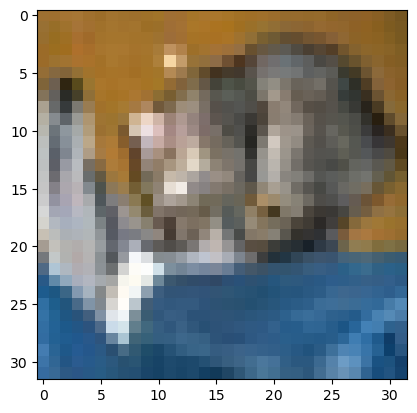

Label = cat
Predicted Label= cat


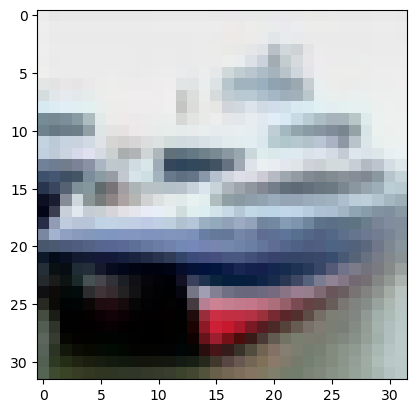

Label = ship
Predicted Label= automobile


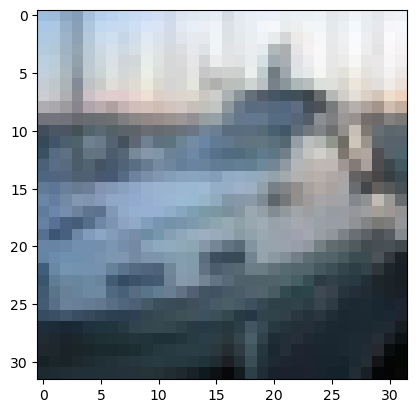

Label = ship
Predicted Label= ship


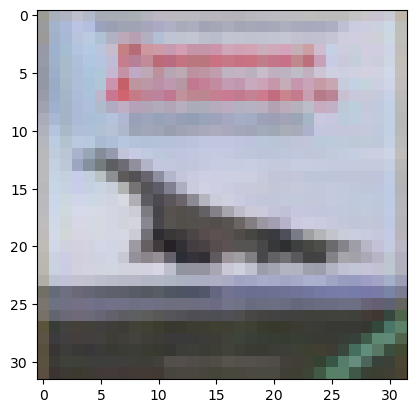

Label = airplane
Predicted Label= airplane


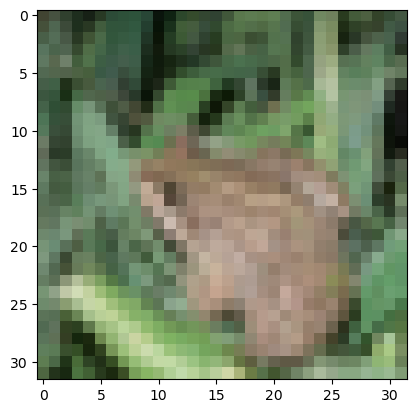

Label = frog
Predicted Label= frog


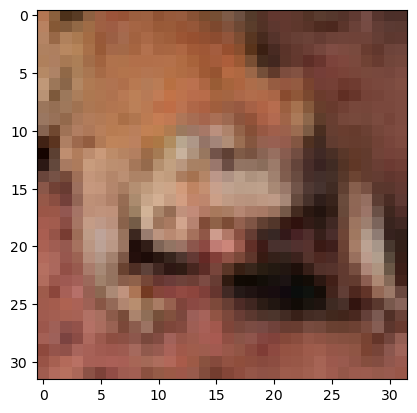

Label = frog
Predicted Label= frog


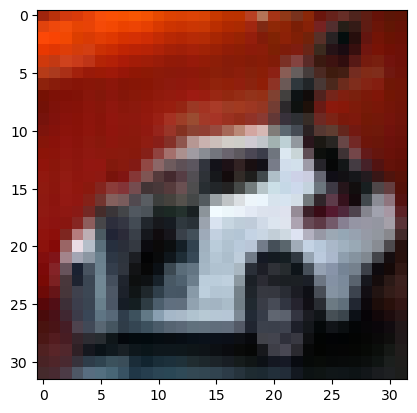

Label = automobile
Predicted Label= automobile


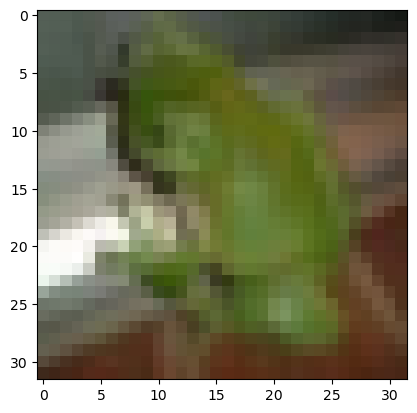

Label = frog
Predicted Label= frog


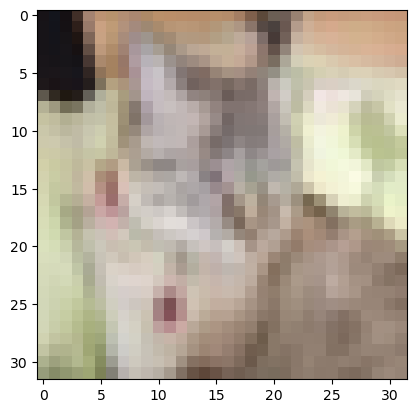

Label = cat
Predicted Label= cat


In [18]:
# Check samples
y_pred = model.predict(x_test)
for i in range(0,9):
    plt.imshow(x_test[i])
    plt.show()
    print("Label =", class_names[y_test[i][0]])
    print("Predicted Label=", class_names[np.argmax(y_pred[i])])

# Part 3

In [19]:
# Model / data parameters
num_classes = 100
input_shape = (32, 32, 3)

class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Normalize images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


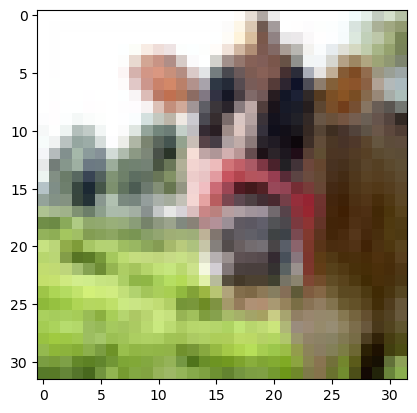

Label: cattle


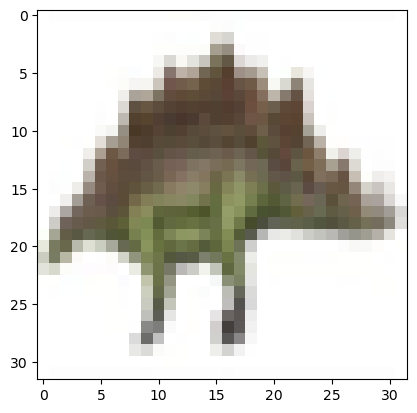

Label: dinosaur


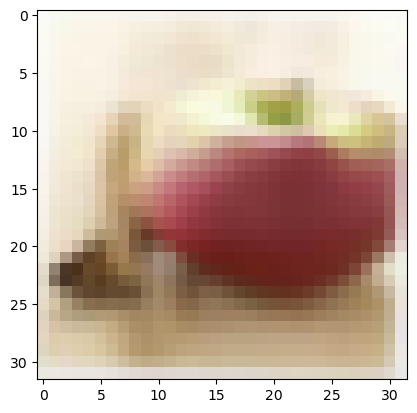

Label: apple


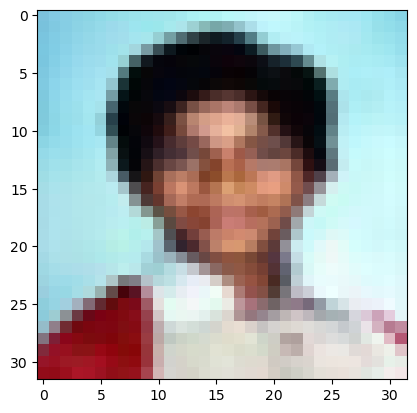

Label: boy


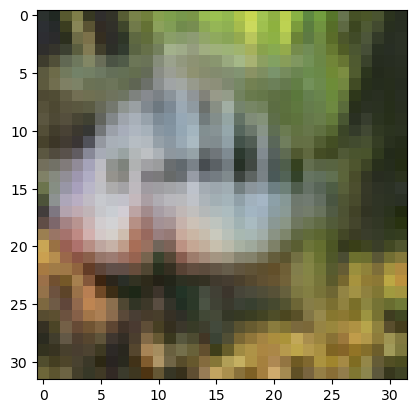

Label: aquarium_fish


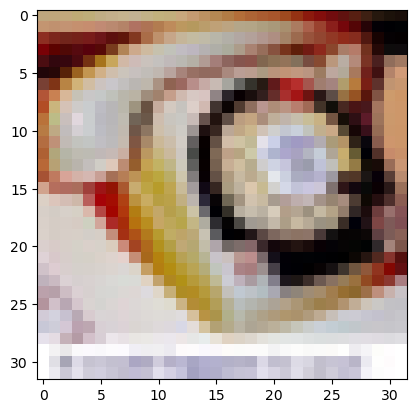

Label: telephone


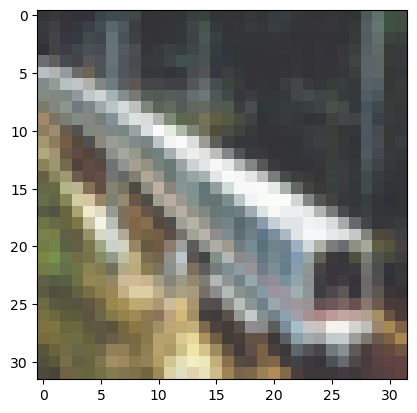

Label: train


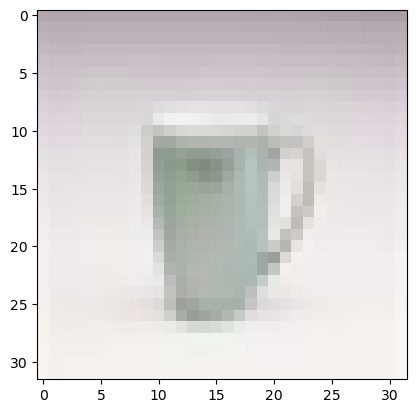

Label: cup


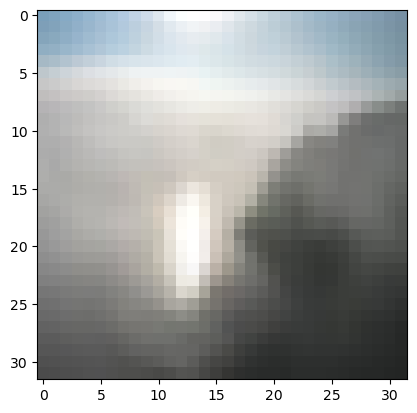

Label: cloud


In [20]:
for i in range(0, 9):
    plt.imshow(x_train[i])
    plt.show()
    print('Label:', class_names[y_train[i][0]])

In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(500, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(300, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(100, activation='softmax')
    ]
)

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │       256,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,244 (2.04 MB)

 Trainable params: 532,196 (2.03 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [23]:
batch_size = 50
epochs = 20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20


2025-03-06 22:52:46.458860: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1390', 128 bytes spill stores, 128 bytes spill loads

2025-03-06 22:52:46.488042: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1844', 4 bytes spill stores, 4 bytes spill loads

2025-03-06 22:52:46.768740: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1844', 4 bytes spill stores, 4 bytes spill loads

2025-03-06 22:52:46.768914: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1844', 84 bytes spill stores, 84 bytes spill loads

2025-03-06 22:52:46.799061: I external/local_xla/xla/stream_ex

900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0976 - loss: 4.1021 - val_accuracy: 0.2006 - val_loss: 3.3146
Epoch 2/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2317 - loss: 3.1170 - val_accuracy: 0.2174 - val_loss: 3.2501
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s -1747us/step - accuracy: 0.2962 - loss: 2.7539 - val_accuracy: 0.3128 - val_loss: 2.7263
Epoch 4/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3443 - loss: 2.5377 - val_accuracy: 0.3710 - val_loss: 2.4486
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3781 - loss: 2.3668 - val_accuracy: 0.3046 - val_loss: 2.7969
Epoch 6/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3998 - loss: 2.2691 - val_accuracy: 0.3214 - val_loss: 2.8066
Epoch 7/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4256 - loss: 2.1443 - val_accuracy: 0.3202 - val_loss: 2.7147
Epoch 8/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4519 - loss: 2.0418 - val_accuracy: 0.4068 - 

In [24]:
# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.063042640686035
Test accuracy: 0.48240000009536743


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


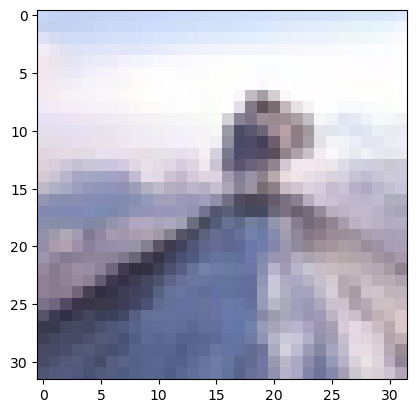

Label = mountain
Predicted Label= whale


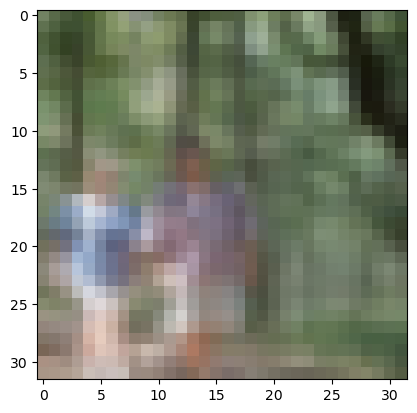

Label = forest
Predicted Label= squirrel


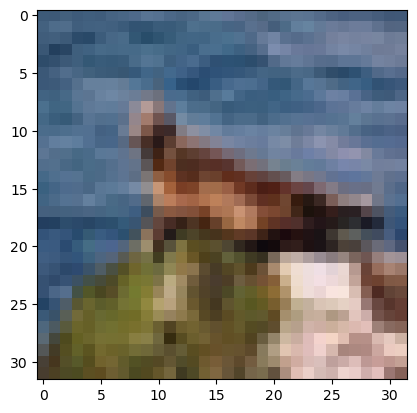

Label = seal
Predicted Label= camel


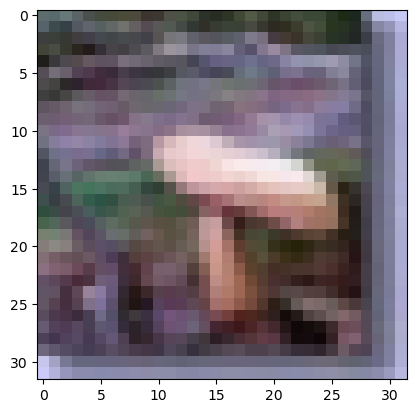

Label = mushroom
Predicted Label= mushroom


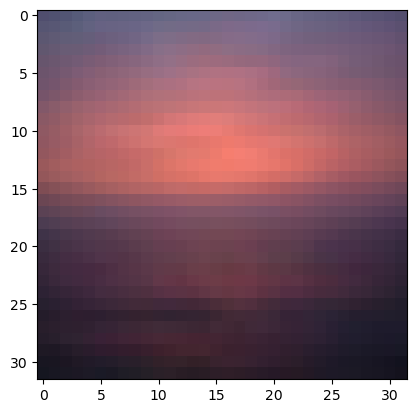

Label = sea
Predicted Label= sea


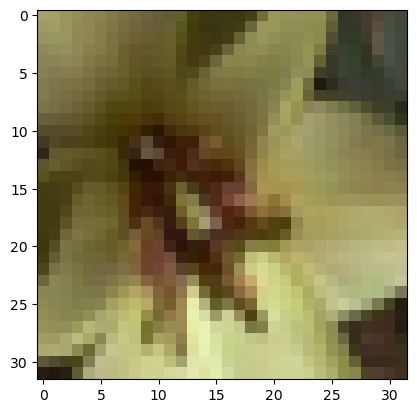

Label = tulip
Predicted Label= lizard


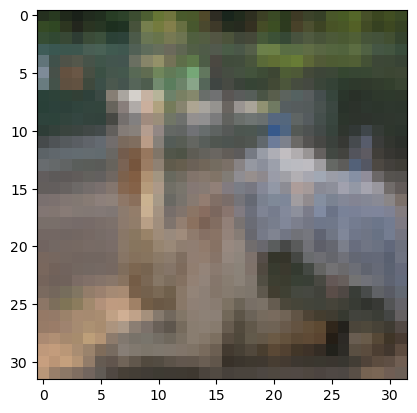

Label = camel
Predicted Label= kangaroo


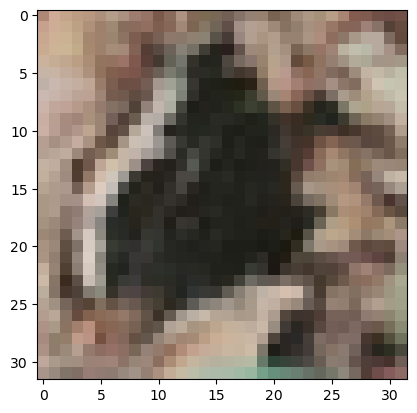

Label = butterfly
Predicted Label= crab


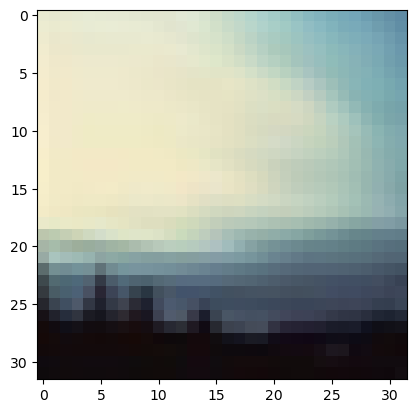

Label = cloud
Predicted Label= sea


In [25]:
# Check samples
y_pred = model.predict(x_test)
for i in range(0,9):
    plt.imshow(x_test[i])
    plt.show()
    print("Label =", class_names[y_test[i][0]])
    print("Predicted Label=", class_names[np.argmax(y_pred[i])])